
# **No-show appointments** _project_



 ## Introduction

  This dataset collects information from 100k medical appointments in **Brazil**

  _Dataset source <a class="c12" href="https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&amp;sa=D&amp;source=editors&amp;ust=1640939295786000&amp;usg=AOvVaw1svyYu9M1wD29XBKgnAy_P">Kaggle</a>_.

 * ‘ScheduledDay’:
 What day the patient set up their appointment.
 * ‘Neighborhood’: 
 The location of the hospital.
 * ‘Scholarship’ AKA ‘Membership’:
 Whether or not the patient is enrolled in the welfare program.
 * _In last column: It says ‘No’ if the patient showed up._

**The main project questions:**

* Did choosing the scheduled day make an effect on showing up appointments?  
* Did determination of the appointment day make an effect on showing up appointments?
* Any other factors are important to predict if a patient will show up for their scheduled appointment?

Importing the necessary Python librarie ⬇


In [147]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

## Data Wrangling



### General Properties

In [148]:
# Load data 
data = pd.read_csv('KaggleV2-May-2016.csv')

# print out some top lines
data.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


Data general info. ⬇

In [149]:
data.shape

(110527, 14)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check missed data and duplicates ⬇

In [151]:
data.duplicated().sum() , data.isnull().sum().sum()

(0, 0)

No Duplicates or NaN found

General descriptive statistics ⬇


In [152]:
data.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


* Minimum age is ( -1 ) , it seems to be a wrong data! ꌇ 

Check the row(s) that mentioned age = -1  ⬇

In [153]:
negative_age=data.query('Age == -1')
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


* Dropping this one-time-showed entry will not affect the final result.

In [154]:
data.drop(negative_age.index,axis=0,inplace=True)

PatientId & AppointmentID columns are not used in my analysis.

Drop both columns ⬇

In [155]:
data.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

# recheck the top 3 rows
data.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


* Unwanted columns plus the negative age row had removed successfully.

Another round of a deep analysis ⬇

In [156]:
data.describe(include='all')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
unique,2,103548,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,71839,24,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88207
mean,NaN,NaN,NaN,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,NaN
std,NaN,NaN,NaN,23.110026,NaN,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


Now data showed us that the minimum age is 0 !  ⬆

Check this zero age 'suspecious' dataset ⬇

In [157]:
zero_age=data.query('Age == 0')
zero_age.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


In [158]:
zero_age.shape

(3539, 12)

In [159]:
data.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

📌 3539 entries *(the majority)* are with zero age! (I think it is not a good idea to drop it)

_It seems that the data entry empolyees didn't care enough to enter the correct age._

Invesigate most Neighbourhoods with zero age entry  ⬇

In [160]:
zero_age.Neighbourhood.value_counts()

MARIA ORTIZ          242
RESISTÊNCIA          196
JESUS DE NAZARETH    134
JARDIM CAMBURI       131
NOVA PALESTINA       117
                    ... 
NAZARETH               3
COMDUSA                2
MORADA DE CAMBURI      2
MATA DA PRAIA          2
UNIVERSITÁRIO          1
Name: Neighbourhood, Length: 75, dtype: int64

The top five neighbourhoods with zero age (wrong age entry issue):

_MARIA, ORTIZ RESISTÊNCIA, JESUS DE NAZARETH, JARDIM CAMBURI and NOVA PALESTINA_

Check the dtypes in the DataFrame ⬇

In [161]:
data.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

ScheduledDay and AppointmentDay data types are object (string)!   ⬆
    
_working on that later in the following section._

### Data Preparing

Some columns names had wrong spelling, plus scholarship is not suitable for such data.

Rename some columns names as below:  ⬇

In [162]:
named_columns = {'Hipertension':'Hypertension','Scholarship':'Membership','Handcap':'Handicap','No-show':'No_show'}

data.rename(columns=named_columns, inplace=True)

# Recheck the results:
data.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Membership,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


Columns names are better now ⬆

Need to get some data from the given ScheduledDay and AppointmentDay data.

So, convert ScheduledDay and AppointmentDay data to datetime first. ⬇

In [163]:
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])

# check
data.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Membership                      int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                        object
dtype: object

Add two new columns for days names of scheduled and appointment days.  ⬇

In [164]:
data['sched_day_name']=data['ScheduledDay'].dt.day_name()
data['appoint_day_name']=data['AppointmentDay'].dt.day_name()

# check the results
data.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Membership,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,sched_day_name,appoint_day_name
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday


recheck general descriptive statistics ⬇

In [165]:
data.describe(include='all',datetime_is_numeric=True)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Membership,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,sched_day_name,appoint_day_name
count,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526,110526,110526
unique,2,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2,6,6
top,F,NaN,NaN,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No,Tuesday,Wednesday
freq,71839,NaN,NaN,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88207,26168,25867
mean,NaN,2016-05-09 07:48:53.920779008+00:00,2016-05-19 00:57:35.968731392+00:00,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,NaN,NaN,NaN
min,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,2016-04-29 10:27:01+00:00,2016-05-09 00:00:00+00:00,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,2016-05-10 12:13:10.500000+00:00,2016-05-18 00:00:00+00:00,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,2016-05-20 11:18:30.249999872+00:00,2016-05-31 00:00:00+00:00,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
max,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,115.000000,NaN,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,NaN,NaN,NaN


Check first scheduled day ⬇

In [166]:
first_scheduled_day= data['ScheduledDay'].min()
first_scheduled_day

Timestamp('2015-11-10 07:13:56+0000', tz='UTC')

First scheduled day was `2015-11-10` ⬆

Check first appointment day ⬇

In [167]:
first_appoint_day= data['AppointmentDay'].min()
first_appoint_day


Timestamp('2016-04-29 00:00:00+0000', tz='UTC')

First appintment day was `2016-04-29`  ⬆

_That means that some pateints had waited a long time to get an appointment!_

Check the patients who their schedule was before the first appointment day. ⬇

In [168]:
old_scheduled = data[data['ScheduledDay']< first_appoint_day]
OS=old_scheduled.No_show.value_counts()

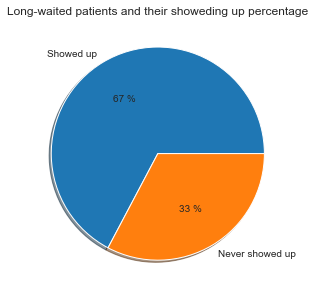

In [169]:
new_label=['Showed up','Never showed up']
plt.pie(OS,autopct='%.0f %%',labels=new_label,shadow=True);
plt.tight_layout();
plt.title('Long-waited patients and their showeding up percentage');
plt.show();

📌 Long-waited patients _majority_ showed up (more than the double).

**Create new two dataframes for `showed up` & `never showed up`  ⬇**

In [170]:
showed_up = data.query('No_show == "No"')

never_showed_up = data.query('No_show == "Yes"')


## Exploratory Data Analysis



### Our project drawer function: 
**`elrassam`**

In [171]:
def elrassam (z):

    """
    Draw all plots in our project.

    Args:
        (str) z - name of the column that we want to visualize its data.
        
    Returns:
        - Special countplot if the argument is 'Neighbourhood'.
        - Special Three boxplots if the argument is 'Age'.
        - General countplots for any other arguments.
        (plus some descriptive statics for int64 dtypes)
    """
            
    if z =='Neighbourhood':
        order_show = showed_up[z].value_counts().head(10).index
        order_no_show = never_showed_up[z].value_counts().head(10).index
        plt.figure(figsize=(9, 5))
        sns.countplot(data=showed_up, y=z, order=order_show,alpha=0.5,label='showed up')
        sns.countplot(data=never_showed_up, y=z, order=order_no_show,label='never showed up')
        plt.legend()
        plt.title('Top 10 Neighboorhoods with the most showed_up and never showed up')
        return plt.show();
    elif z =='Age':
        print(pd.DataFrame(data[z].describe(include='all',datetime_is_numeric=True).loc['min':'max']))
        sns.boxplot(y="Age",x="No_show",data=data,width=0.4)
        plt.xlabel('No_show')
        plt.ylabel('Age (years)')
        plt.title(f'{z} and showed up & never showed up',size='15')
        plt.show()
        sns.boxplot(y="Age",x="No_show",data=data,width=0.4,palette="rainbow",hue="Diabetes")
        plt.show()
        sns.boxplot(y="Age",x="No_show",data=data,width=0.4,palette="tab20_r",hue="Hypertension")
        return plt.show();
    else:
        plt.xlabel(f'{z}')
        plt.ylabel('Counts')
        plt.title(f'{z} and showed up & never showed up counts',size='15')
        if data[z].dtype == 'int64':
            print(pd.DataFrame(data[z].describe(include='all',datetime_is_numeric=True).loc['min':'max']))
        sns.countplot(data=showed_up,x=z,order=data[z].value_counts().index,label='showed up',alpha=0.5)
        sns.countplot(data=never_showed_up,x=z,order=data[z].value_counts().index,label='never shown up')
        plt.legend()
        return plt.show();

### Scheduled week-days relationship analysis 📊

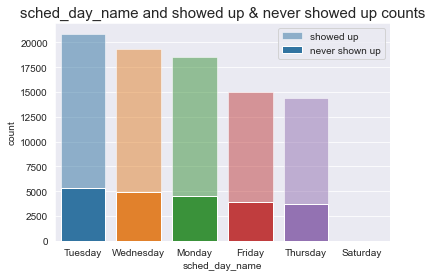

In [172]:
elrassam('sched_day_name')

Comments:

✍ No clear view of a relation between the scheduled week-days and showing up or absence.

✍ Majority showed up.

✍ Nobody scheduled an appointment on Sunday.

### Appointment week days relationship analysis 📊

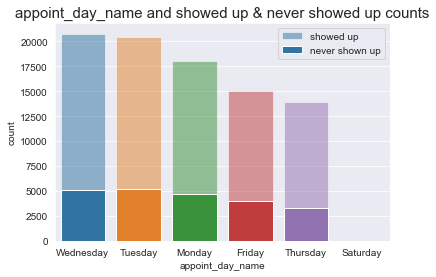

In [173]:
elrassam('appoint_day_name')

Comments:

✍ No clear view of a relation between the appointment week-days and showing up or absence.

✍ Majority showed up.

### Gender relationship analysis 📊

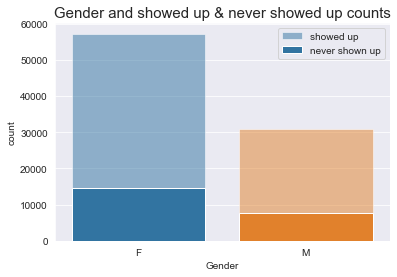

In [174]:
elrassam('Gender')

Comments:

✍ No clear view of a relation between the gender type and showing up or absence.

✍ Majority showed up.

✍ Females represent the majority for showing up or absence.

### Age relationship analysis 📊

       Age
min    0.0
25%   18.0
50%   37.0
75%   55.0
max  115.0


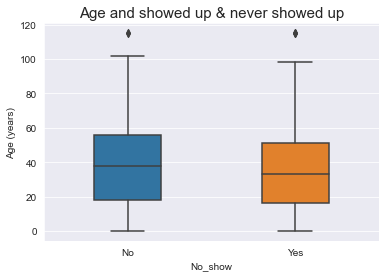

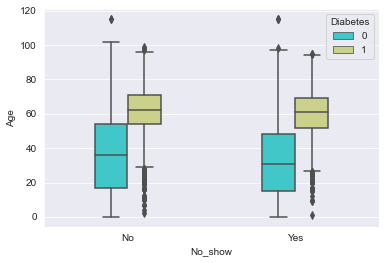

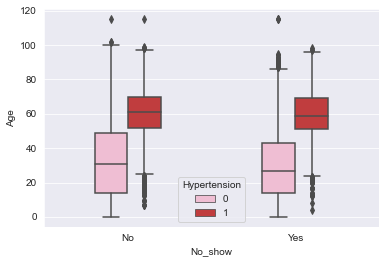

In [175]:
elrassam('Age')

Comments:

✍ No clear view of a relation between the age and showing up or absence.

✍ The mean age of the patients who had diagnosises was 60 years.

✍ Patients' mean age was 37 years. oldest patient age was 115 years.

### Neighbourhood relationship analysis 📊

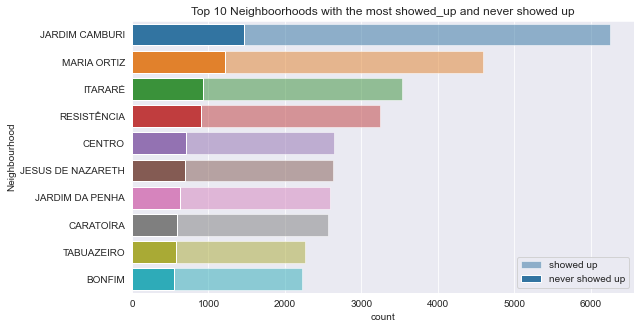

In [176]:
elrassam('Neighbourhood')  ## Top 10 Neighbourhoods graph

Comments:

✍ Some neighboorhoods have high levels of patients showed up counts versus others.

✍ Majority showed up in all neighboorhoods.

✍ We didn't have enough informations to justify the reasons of the difference of counts for each neighboorhood.

### Membership relationship analysis 📊

     Membership
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0


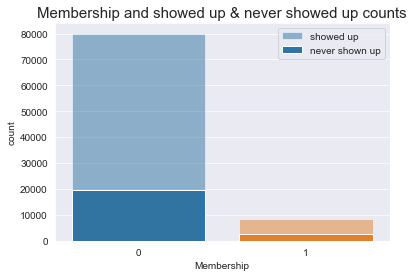

In [177]:
elrassam('Membership')

Comments:

✍ No clear view of a relation between the membership types and showing up or absence.

✍ Majority showed up.

✍ Majority doesn't have a membership.

### Hypertension relationship analysis 📊

     Hypertension
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0


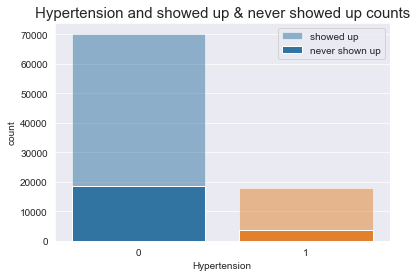

In [178]:
elrassam('Hypertension')

Comments:

✍ No clear view of a relation between hypertension disease and showing up or absence.

✍ Majority showed up.

✍ Majority didn't have hypertension disease.

### Diabetes relationship analysis 📊

     Diabetes
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       1.0


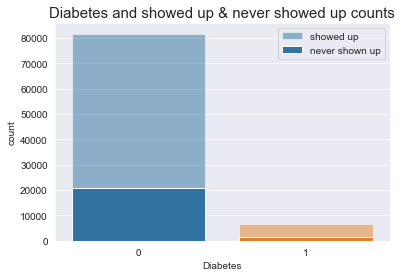

In [179]:
elrassam('Diabetes')

Comments:

✍ No clear view of a relation between diabetes disease and showing up or absence.

✍ Majority showed up.

✍ Majority didn't have diabetes disease.

### Alcoholism relationship analysis 📊

     Alcoholism
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0


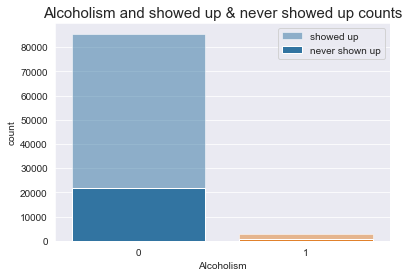

In [180]:
elrassam('Alcoholism')

Comments:

✍ No clear view of a relation between alcoholism and showing up or absence.

✍ Majority showed up.

✍ Majority didn't have alcoholism.

### Handicap relationship analysis 📊

     Handicap
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       4.0


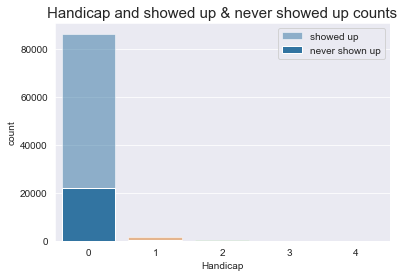

In [181]:
elrassam('Handicap')

Comments:

✍ No clear view of a relation between having a handicap and showing up or absence.

✍ Majority showed up.

✍ Majority didn't have a handicap.

### SMS_received relationship analysis 📊

     SMS_received
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           1.0


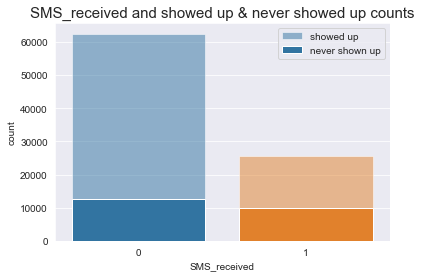

In [182]:
elrassam('SMS_received')

Comments:

✍ No clear view of a relation between receiving SMS and showing up or absence.

✍ Majority showed up.

✍ The showing up patients who didn't receive SMS almost were the double of the who received SMS !! 

## Conclusions


1. Majority had showed up.
2. The patients' choosing of the scheduled day didn't make an effect on their showing up for the appointments.
3. The hospital's determination of the appointment day didn't make an effect on the patients showing up for the appointments.
   even the  long-waited patients showed up more than not showed.
4. We can't define a specific factor that said that the patient would show up or not.

### Limitations

1. Original dataset continued a lot of incorrect information about age.
2. Not enough data factors/parameters to give us a clear view or a decision.
